In [293]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from numpy.random import RandomState
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

In [294]:
dataset = sklearn.datasets.fetch_olivetti_faces(shuffle=False, random_state=RandomState(0))
#print(dataset)
images = dataset.images
target = dataset.target
target_ids = np.unique(target)
#print(images, target)

# Info of dataset
print("Original Image shape :\n", images.shape)
print("Number of images in the dataset :\n", len(X))
print("Target ID:\n", target_ids)

Original Image shape :
 (400, 64, 64)
Number of images in the dataset :
 400
Target ID:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


Text(0.5, 0.98, 'Distinct People in dataset')

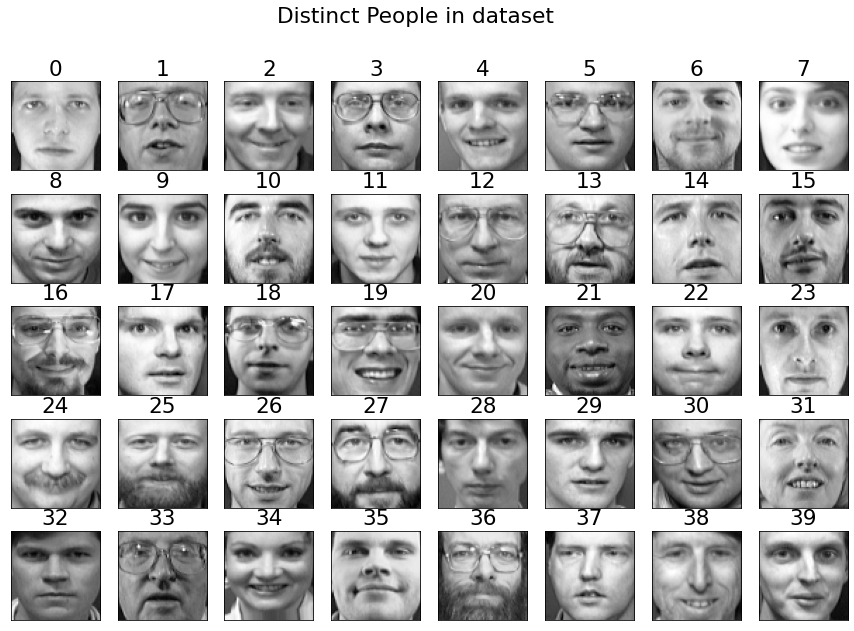

In [295]:
# Creating 5 x 8 subplot with each image size 15x10.
fig, axarr = plt.subplots(nrows=5, ncols=8, figsize=(15, 10))
# We change the above cosidered matrix into array
axarr = axarr.flatten()

#iterating over user ids
for unique_id in target_ids:
    image_index=unique_id*10
    axarr[unique_id].imshow(images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title(unique_id)
    
plt.suptitle("Distinct People in dataset")

In [296]:
# We reshape images for machine learnig  model
X = data.reshape((images.shape[0], images.shape[1]*images.shape[2]))
print("Reshaped Images (X):", X.shape)

# Split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=target, random_state=0)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

Reshaped Images (X): (400, 4096)
X_train shape:  (260, 4096)
y_train shape:  (260,)


# Reducing the size of dataset 

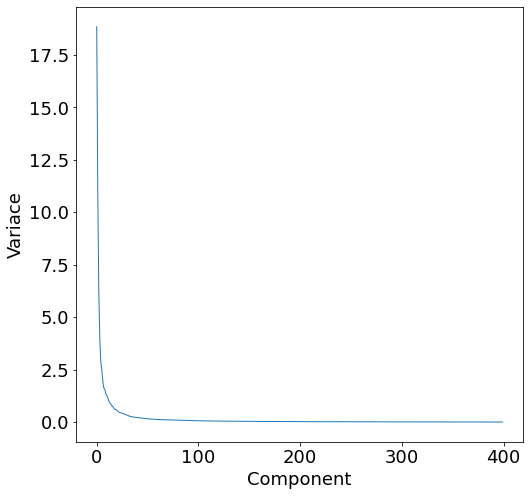

Text(0.5, 1.0, 'Eigefvace or Everage Face')

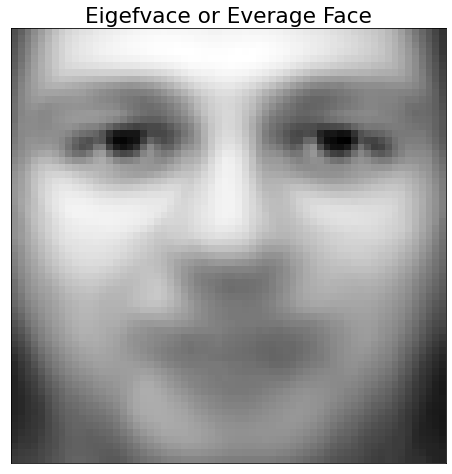

In [297]:
from sklearn.decomposition import PCA
pca = PCA(n_components=400)
pca.fit(X)
X_pca = pca.transform(X)   #
#print(X_pca)

# plot the component vs variance graph
plt.figure(1, figsize=(8,8))
plt.plot(pca.explained_variance_, linewidth=1)
plt.xlabel('Component')
plt.ylabel('Variace')
plt.show()

# To show the Eigenface
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Eigefvace or Everage Face')

# Classification of the dataset.

In [298]:
X_train_pca = pca.transform(X_train)
X_test_pca =  pca.transform(X_test)
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
#print(y_pred)
#print(y_test)
print("accuracy score : ", metrics.accuracy_score(y_test, y_pred))
print("Test Score", y_test, y_pred)

accuracy score :  0.9214285714285714
Test Score [26  3 27 22 29 14  8 28 26 12 39  5 28  3 17  4 36 39 35  6 34  1 17 39
  6  4 18  0 19 23  3 36 11 33 38 10 16  7  1 12 37  0  5 30 24 23 31 21
 22 38 16 15  2 25  8 32 26 33 13 28  9 21 31 34 29 10 38 30  2 19  0  2
 18 24 27  7  7 11  5 18 20 25 31 23 19 34 14 37 25 10 32 13 35 32  1 33
 20 21 17 14 29  6 24  9  8 31  3  7 22 33 12 30 14  1 32 21 27  5  9 36
 15 13 16  9 11 19  0  6 26  4 23 35 37 24 15 13 38 12 20 17] [26  3 27 22 29 14  8 28 26  3  4  5 28  3 17  4 36 39 35  6 34  1 17 39
  6 39 18  0 19 23  3 36 11 33 38 10 16  7  1 12 37 39  5 30 24 23 31 21
 22 38 16 15  2 25  8 32 26 33 13 28  7 21 31 34 29 10 38 30  2 19  0  2
 18 24 27  7  7 11  5 18 20 25 31 23 19 34 14 37  2 10 32 13  6 32  1 33
 20 21 17 14 29  6 24  9  8 31 22  7 22 33  2 30 14  1 32 21 27  5  9 36
 15 13 16  9 11 19  0  6 26  4 23  6 37 39 15 13 38 12 20 17]


# Printing the confusion matrix
Columns of the matrix will give the predicted instances whether row gives the actual instances for each label.

In [306]:
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall
print(metrics.classification_report(y_test, y_pred))

[[3 0 0 ... 0 0 1]
 [0 4 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         4
           2       0.60      1.00      0.75         3
           3       0.75      0.75      0.75         4
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         4
           6       0.67      1.00      0.80         4
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15   